# Display training results

/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

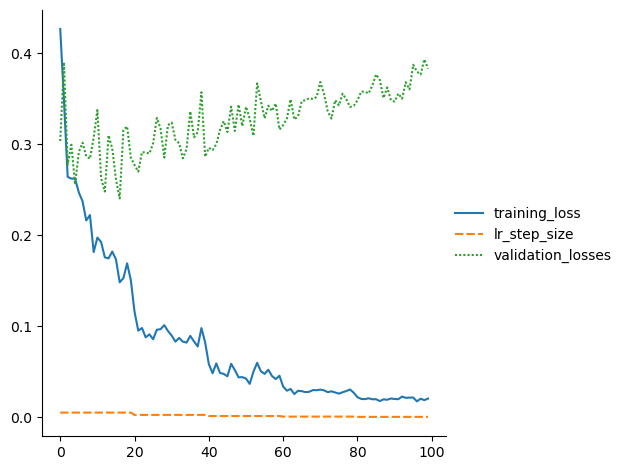

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = "/Users/magnuswiik/Documents/NTNU/5.klasse/Masteroppgave/masterthesis/IDUNfiles/models/model2/metrics.csv"
keypoint_path = "/Users/magnuswiik/Documents/NTNU/5.klasse/Masteroppgave/masterthesis/IDUNfiles/keypointrcnn/metrics.csv"
landmark_path = "/Users/magnuswiik/Documents/NTNU/5.klasse/Masteroppgave/masterthesis/IDUNfiles/landmark_models/model1/metrics.csv"
mobile_path = "/Users/magnuswiik/Documents/NTNU/5.klasse/Masteroppgave/masterthesis/IDUNfiles/fasterrcnn/models/mobilemodel1/metrics.csv"
df = pd.read_csv(mobile_path)

training_loss = df['training_loss']
validation_loss = df['validation_losses']

sns.relplot(df, kind='line')